In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [43]:
df_mouse_b_enac = pd.read_csv('mouse_b_enac_summary.csv')
df_mouse_b_enac.shape

(28, 9)

In [44]:
# One more column for genotype
df_mouse_mps = pd.read_csv('mouse_mps_summary.csv')
df_mouse_mps.shape

(33, 9)

In [45]:
df_rat_pa = pd.read_csv('rat_pa_summary.csv')
df_rat_pa.shape

(83, 9)

In [46]:
df_rat_sterile_baseline = pd.read_csv('rat_sterile_baseline_summary.csv')
df_rat_sterile_baseline.shape

(51, 9)

In [47]:
df_rat_sterile_post_beads = pd.read_csv('rat_sterile_post_beads_summary.csv')
df_rat_sterile_post_beads.shape

(53, 9)

# PCA

# Rat bead study  (baseline vs post beads)

In [96]:
def pca_2D(df, title):
    
    features = df[['VDP(%)','MSV(mL/mL)','TV(L)','VH(%)','VHSS(%)','VHLS(%)']]
    
    if 'Beads' in df.columns:
        target = df['Beads']
    else:
        target = df['Genotype']

    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)

    # Apply PCA with two components
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(features_standardized)
    explained_variance_ratios = pca.explained_variance_ratio_
    print('The amount of variance explained by [PC1 PC2] =', explained_variance_ratios)

    # Create a new DataFrame with the principal components and class labels
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['target'] = target

    # Plot the PCA results
    plt.figure(figsize=(7, 5))
    classes = pca_df['target'].unique()

    for c in classes:
        subset = pca_df[pca_df['target'] == c]
        plt.scatter(subset['PC1'], subset['PC2'], label=c)

    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()


In [128]:
def pca_3D(df, title):
    
    features = df[['VDP(%)','MSV(mL/mL)','TV(L)','VH(%)','VHSS(%)','VHLS(%)']]
    
    if 'Beads' in df.columns:
        target = df['Beads']
    else:
        target = df['Genotype']

    # Standardize the features
    scaler = StandardScaler()
    features_standardized = scaler.fit_transform(features)

    # Apply PCA with two components
    pca = PCA(n_components=3)
    principal_components = pca.fit_transform(features_standardized)
    explained_variance_ratios = pca.explained_variance_ratio_
    print('The amount of variance explained by [PC1 PC2 PC3] =', explained_variance_ratios)

    # Create a new DataFrame with the principal components and class labels
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
    pca_df['Label'] = target
    fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='Label', labels={'PC1': 'PC1', 'PC2': 'PC2', 'PC3': 'PC3'}, title=title)
    fig.show()


The amount of variance explained by [PC1 PC2] = [0.60722275 0.18051376]


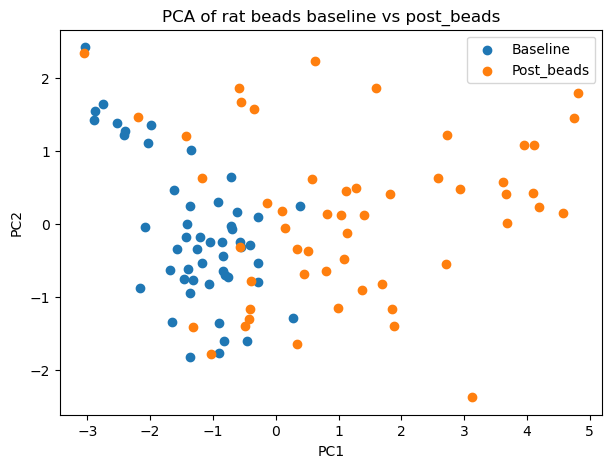

In [114]:
df_rat_combine = pd.concat([df_rat_sterile_baseline, df_rat_sterile_post_beads], ignore_index=True)
pca_2D(df_rat_combine, 'PCA of rat beads baseline vs post_beads')

In [129]:
pca_3D(df_rat_combine, 'PCA of rat beads baseline vs post_beads')

The amount of variance explained by [PC1 PC2 PC3] = [0.60722275 0.18051376 0.12836501]


# Rat_PA study (WT, KO, CF)

In [130]:
df_rat_pa = pd.read_csv('rat_pa_summary.csv')
df_rat_WT = df_rat_pa[df_rat_pa['Genotype'] == 'WT']
df_rat_KO = df_rat_pa[df_rat_pa['Genotype'] == 'KO']
df_rat_CF = df_rat_pa[df_rat_pa['Genotype'] == 'CF']

The amount of variance explained by [PC1 PC2] = [0.56015903 0.19775083]


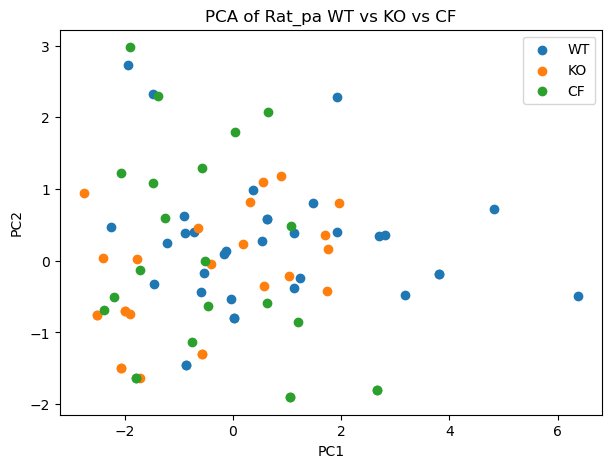

In [131]:
df_rat_pa_combine = pd.concat([df_rat_WT, df_rat_KO, df_rat_CF], ignore_index=True)
pca_2D(df_rat_pa_combine, 'PCA of Rat_pa WT vs KO vs CF')

In [133]:
pca_3D(df_rat_pa_combine, 'PCA of Rat_pa WT vs KO vs CF')

The amount of variance explained by [PC1 PC2 PC3] = [0.56015903 0.19775083 0.14882577]


# Mouse B-Enac study (B-Enac vs WT)

In [135]:
df_mouse_b_enac = pd.read_csv('mouse_b_enac_summary.csv')
df_WT = df_mouse_b_enac[df_mouse_b_enac['Genotype'] == 'WT']
df_b_enac = df_mouse_b_enac[df_mouse_b_enac['Genotype'] == 'B_Enac']

The amount of variance explained by [PC1 PC2] = [0.56828803 0.24904918]


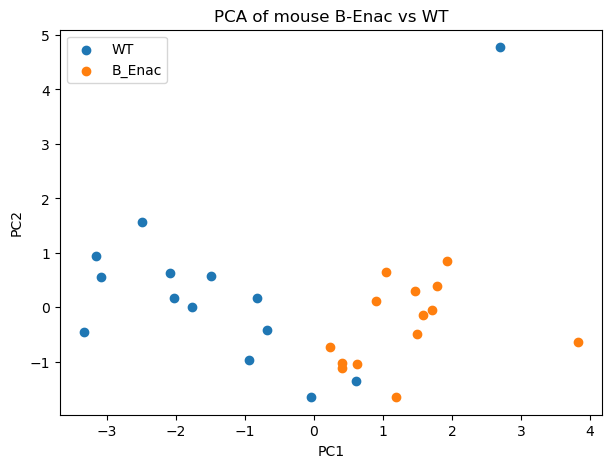

In [136]:
df_mouse_combine = pd.concat([df_WT, df_b_enac], ignore_index=True)
pca_2D(df_mouse_combine, 'PCA of mouse B-Enac vs WT')

In [137]:
pca_3D(df_mouse_combine, 'PCA of mouse B-Enac vs WT')

The amount of variance explained by [PC1 PC2 PC3] = [0.56828803 0.24904918 0.12631325]


# Mouse MPS study (MPS_I vs WT vs Het)

The amount of variance explained by [PC1 PC2] = [0.73313    0.16174752]


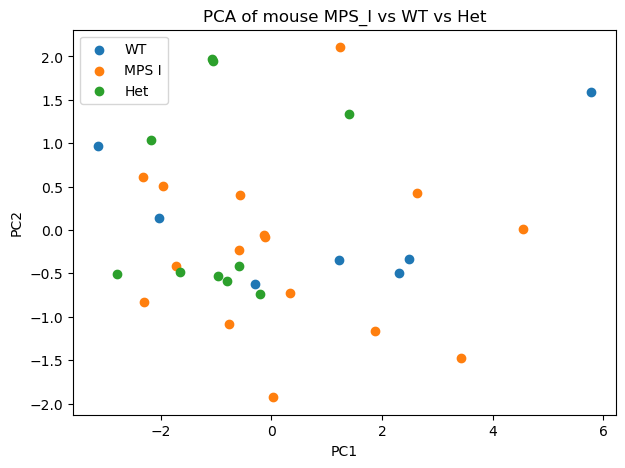

In [138]:
df_mouse_mps = pd.read_csv('mouse_mps_summary.csv')
df_WT = df_mouse_mps[df_mouse_mps['Genotype'] == 'WT']
df_MPS_I = df_mouse_mps[df_mouse_mps['Genotype'] == 'MPS I']
df_Het = df_mouse_mps[df_mouse_mps['Genotype'] == 'Het']

df_mouse_combine = pd.concat([df_WT, df_MPS_I, df_Het], ignore_index=True)
pca_2D(df_mouse_combine, 'PCA of mouse MPS_I vs WT vs Het')

In [139]:
pca_3D(df_mouse_combine, 'PCA of mouse MPS_I vs WT vs Het')

The amount of variance explained by [PC1 PC2 PC3] = [0.73313    0.16174752 0.06562398]
